**Author:** Beatrice Occhiena s314971. See [`LICENSE`](https://github.com/beatrice-occhiena/Computational_intelligence/blob/main/LICENSE) for details.
- institutional email: `S314971@studenti.polito.it`
- personal email: `beatrice.occhiena@live.it`
- github repository: [https://github.com/beatrice-occhiena/Computational_intelligence.git](https://github.com/beatrice-occhiena/Computational_intelligence.git)

**Resources:** These notes are the result of additional research and analysis of the lecture material presented by Professor Giovanni Squillero for the Computational Intelligence course during the academic year 2023-2024 @ Politecnico di Torino. They are intended to be my attempt to make a personal contribution and to rework the topics covered in the following resources.
- [https://github.com/squillero/computational-intelligence](https://github.com/squillero/computational-intelligence)
- Stuart Russel, Peter Norvig, *Artificial Intelligence: A Modern Approach* [3th edition]
- Sean Luke, *Essentials of Metaheuristics*, 2016 [online version 2.3]
- Nikolaus Hansen, Dirk V. Arnold, Anne Auger, *Evolution Strategies*, February 2015

.

.

# Single-state methods

##### Global search algorithms 🌍
They are designed to explore the entire search space, looking for the absolute best solution. They are essential when finding the global optimum is critical or when we need to find the path to the solution.
- `Global optimization`
- `Exploratory` in nature, i.e. they explore a broad range of different possibilities
- Computationally & memory expensive
- Not sensitive to the quality of the initial node/solution

##### Local search algorithms 🔎
They are designed to find a local optimum within a specific region of the search space (the neighborhood of the initial solution). They are called single-state methods because they operate on a single solution at a time (the current node) and they do not keep track of the global context. They can be used when finding the path is irrelevant, since the final solution is the only thing that matters. Very effective to refine a previously found solution.
- `Local optimization`
- `Exploitative` in nature, i.e. they concentrate on improving a given solution by making small, incremental adjustments
- Computationally & memory efficient
  - constant memory requirement
  - $\implies$ suitable for very large search spaces, especially for infinite continuous spaces
- Very sensitive to the quality of the initial solution
- Termination criteria:
  - a local optimum is reached
  - a specified level of improvement is achieved
  - a maximum number of iterations is reached
  - a maximum number of evaluations is reached

    *Counting the number of evaluations is especially important when we want to explore n_samples different neighbor solutions at each iteration $\implies n_{evaluations} = n_{iterations} \times n_{samples}$.*

## Introduction

### Scope and applications
Single-state methods are very useful to solve:
1. **Pure optimization problems** $\rightarrow$ find the best state according to a given `objective function`.
  - *Numerical optimization*: in logistcs, engineering, finance, etc.
  - *Machine learning*: in the training phase of many algorithms to find the best set of parameters
2. **Satisfaction problems** $\rightarrow$ find a state that satisfies a `set of constraints`.
  - *Scheduling*: in creating timetables, production plans, etc.
  - *Design*: to find a functional configuration of a system

Many real-world problems belongs to these category, since usually there is no clealry define "goal state" to reach nor a "path" to follow. For example, nature provides an objective function called *reproductive fitness*, which is maximized by the evolutionary process. 

### State-space landscape
It is the graphical representation of the state-space, where the height of each point represents the value of the `objective function`. Each point or region represents a possible state or solution to the problem. The goal of the optimization process is to find the highest peak in the landscape, i.e. the global optimum.

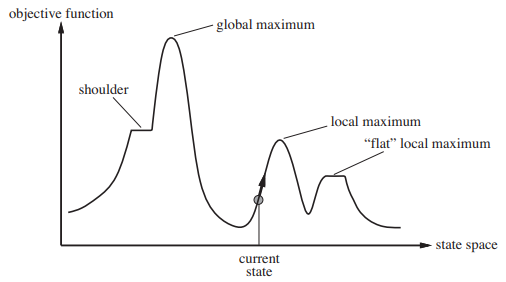

The `topology` of the state-space landscape refers to its shape and structure. It can be flat, rugged, smooth, convex, concave, or contain multiple peaks, valleys, or plateaus. The landscape's topology has a significant impact on the difficulty of solving the problem.

> ⚠️ The choice of the right fitness function is crucial to the success of the optimization process. It must be able to distinguish between good and bad solutions, and it must be able to guide the search towards the global optimum $\implies$ if our design attributes the same fitness value to multiple solutions (plateaus), the search will probably get stuck most of the time. Also the process of evaluating a solution could be very expensive (e.g. in the case of a simulation), so we want to minimize the number of evaluations.

#### Main inspiration: gradient ascent 📈
It is a classical mathematical technique to find the local optimum of a function $f(x)$, where $x$ is a vector of parameters. It leverages its gradient $\nabla f(x)$, the vector of partial derivatives that points in the direction of the steepest ascent.

$\nabla f(x) = \left( \frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2}, ..., \frac{\partial f(x)}{\partial x_n} \right)$

It can be converted into a simple greedy algorithm to find our desired local optimum, since it always chooses the best option at each step.
- *Initialization*: choose a random starting point $x_0$
- *Iteration*: $x_{i+1} = x_i + \alpha \nabla f(x_i)$
- *Termination*: when $\nabla f(x_i) < \epsilon \sim 0$

##### Issues
1. `Overshooting`: This method is very sensitive to the choice of the learning rate $\alpha$, since it can cause oscillations or divergence when we are close to the optimum.
2. `Local optima`: It can get stuck in a local optimum, since it does not consider the global context. Possible solutions are:
    - *Random restarts*: restart the algorithm from a different random starting point
    - *Adjusting $\alpha$*: to a sufficiently large value to overshoot the local optimum and land in a different region of the landscape
> 3. `Initial huge assumpion`: we assume to be able to compute the gradient of the objective function, when in most cases we don't even know what the function looks like. *All we have is a black-box model in which we have a way of modifying the input parameters and a way of measuring the quality of the solution, but no idea what kind of surface the quality assessment function looks like when plotted.*


### General procedure
- **Initialization**: choose a starting candidate solution
- **Evaluation**: evaluate the quality of the current solution using the `objective/fitness function`
- **Modification**: `tweak` the current solution to obtain a new candidate solution
- **Selection**: choose which candidate solution to keep
- **Termination**: stop when a termination criterion is met
  - Maximum number of iterations
  - Maximum number of evaluations
  - Wall-clock time
  - Quality threshold

In [4]:
class SingleStateProblem:
  def __init__(self):
    """Initialize the problem-specific parameters"""
    raise NotImplementedError
  
  def initial_solution(self):
    """Generate and return an initial solution"""
    raise NotImplementedError
  
  def evaluate(self, solution):
    """Evaluate the quality of the given solution and return a numerical value"""
    raise NotImplementedError
  
  def tweak(self, solution):
    """Tweak the given solution to generate a new one"""
    raise NotImplementedError

  def is_valid(self, solution):
    """Check if the solution is valid"""
    raise NotImplementedError
  
  def is_goal(self, solution):
    """Check if the solution is good enough to be considered as a final goal and terminate the search"""
    raise NotImplementedError

  def get_neighbors(self, solution):
    """Return all the neighbors of the given solution"""
    raise NotImplementedError

#### Tweaking
Tweaking plays a crucial role in fine-tuning solutions and navigating complex search spaces. It involves making incremental, often small, adjustments to a candidate solution to explore nearby states in the search space.

Optimization algorithms define specific `tweak operators` tailored to the problem. These operators dictate how to modify solutions, such as:
- swapping elements
- adjusting values
- applying random noise

#### Compromise between extremes
- 🔎 **Exploitation**: make small adjustments to the current solution to improve it
  1. *Adjust the modification procedure*, usually making a `small tweak` to the current solution
  2. *Use a larger sample*, exploring a larger region of the search space (`neighborhood`) at each step
  
- 🗺️ **Exploration**: make large adjustments to explore a different region of the search space

  1. *Adjust the modification procedure*, occasionally making a `big tweak` to explore a different region of the search space
  2. *Adjust the selection procedure*, occasionally accept a `worse solution` to avoid getting stuck in a local optimum
  3. *Jump to sth new*, restarting the algorithm from a `different random starting point` to explore a different region of the search space

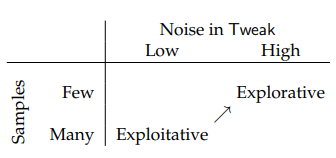


## Strategies

### Hill climbing

#### Random mutation HC

This technique is inspired by gradient ascent, but it does not require the knowledge of the gradient at all (strenght and direction). It just iteratively test new candidate solutions in the region of the current candidate, and adopt the new ones if they're better.

> It employs a more general `tweak` operation that introduces a small random local change to the current solution $\rightarrow$ we are actually wandering around in its *neighborhood*

In [1]:
def random_mutation_hill_climbing(problem, max_iterations=1000):
    
  current_solution = problem.initial_solution()
  current_value = problem.evaluate(current_solution)

  # Loop until we reach the maximum number of iterations
  for _ in range(max_iterations):
    new_solution = problem.tweak(current_solution)
    new_value = problem.evaluate(new_solution)
    if new_value > current_value:
      current_solution = new_solution
      current_value = new_value

    # If we have reached a satisfactory solution, stop
    if problem.goal_test(current_solution):
      break

  return current_solution

#### Steepest ascent HC
To enhance the efficiency of this algorithm, we can adopt a more aggressive strategy, generating multiple "tweaks" to a candidate solution simultaneously, and then selecting the best-performing one for adoption.
> By sampling multiple points around the original candidate solution and choosing the best among them, its effectively mimics the process of `sampling the gradient` and ascending directly in its direction.

In [5]:
def steepest_ascent_hill_climbing(problem, n_samples=10, max_iterations=1000):
  
  current_solution = problem.initial_solution()
  current_value = problem.evaluate(current_solution)

  # Loop until we reach the maximum number of iterations
  for _ in range(max_iterations):
    
    # Generate a list of neighbor solutions and choose the best one
    neighbors = [problem.tweak(current_solution) for _ in range(n_samples)]
    best_neighbor = max(neighbors, key=problem.evaluate)
    best_value = problem.evaluate(best_neighbor)

    # If the best neighbor is better than the current solution, move to it
    if best_value > current_value:
      current_solution = best_neighbor
      current_value = best_value

    # If we have reached a satisfactory solution, stop
    if problem.goal_test(current_solution):
      break

  return current_solution  

#### Random-restart HC
In order to avoid getting stuck in a local optimum, we can restart the algorithm from a different random starting point. Note that we're just increasing the probability of finding the global optimum, but we're not guaranteed to find it.

> This is a very simple and effective technique, especially when we cannot clearly identify a good starting point.

In [6]:
def random_restart_hill_climbing(problem, n_restarts=10, max_iterations=1000):
  """
    In this case, we want the function problem.initial_solution() 
    to return always new random solutions!
  """
  best_solution = None
  best_value = float('-inf')

  for _ in range(n_restarts):

    # Generate a new random solution
    current_solution = problem.initial_solution()
    current_value = problem.evaluate(current_solution)

    # Run the one hill climbing algorithm variant on the current solution
    current_solution = steepest_ascent_hill_climbing(problem, max_iterations=max_iterations)
    current_value = problem.evaluate(current_solution)

    # If the current solution is better than the best one, move to it
    if current_value > best_value:
      best_solution = current_solution
      best_value = current_value
    
    # If we have reached a satisfactory solution, stop
    if problem.goal_test(best_solution):
      break

  return best_solution

### Simulated annealing
Simulated Annealing is a problem-solving technique inspired by the process of cooling molten metal. It's used to find optimal solutions in complex, multi-modal, large-scale search spaces.

> 🌡️ The key idea is to start with a high temperature that allows for random *exploration* of the solution space $\rightarrow$ it resembles a `random walk`.

>  ❄️ As the temperature decreases over time, the algorithm becomes more focused on *exploiting* promising areas $\rightarrow$ it resembles `hill climbing`.

#### Adjustment of the selection procedure
The probability of accepting a new candidate solution is defined by the `Boltzmann distribution`:
- $S$ = current solution
- $R$ = new candidate solution
- $t$ = current temperature
- $c$ = cooling rate $\in [0,1]$ that defines how fast the temperature decreases

$P(R|S,t) = e^{\frac{Quality(R)-Quality(S)}{t}}$

In [7]:
import numpy as np

def simulated_annealing(problem, temperature=100, cooling_rate=0.95, max_iterations=1000):
  
  current_solution = problem.initial_solution()
  current_value = problem.evaluate(current_solution)

  # Loop until we reach the maximum number of iterations
  for _ in range(max_iterations):
    
    # Generate a new solution by tweaking the current one
    new_solution = problem.tweak(current_solution)
    new_value = problem.evaluate(new_solution)

    # If the new solution is better than the current one, move to it
    if new_value > current_value:
      current_solution = new_solution
      current_value = new_value
    else:
      # Otherwise, move to the new solution with a certain probability
      probability = np.exp((new_value - current_value) / temperature)
      if np.random.rand() < probability:
        current_solution = new_solution
        current_value = new_value

    # If we have reached a satisfactory solution or the temperature is too low, stop
    if problem.goal_test(current_solution) or temperature < 0.01:
      break

    # Cool down the temperature
    temperature *= cooling_rate

  return current_solution

### Tabu search
Tabu search is a popular metaheuristic that guides a local search procedure to explore the search space beyond the local optimum.

> 🙅🏻‍♀️ It is based on the idea of `forbidding` the algorithm to visit the same state twice, i.e. it keeps track of the visited states in a `tabu list` and avoids them for a certain number of iterations.

It is particularly effective in solving *combinatorial optimization problems*, where the goal is to find the best solution from a finite set of possibilities. But really only works well when the search space is discrete and finite.
- ⚠️ If the search space is continuous or infinite, only in truly and exceptionally rare cases will the algorithm ever visit the same state twice! In this case, we should check if the current solution is *sufficiently similar* to a previously visited one, and then decide whether to forbid it or not.

In [9]:
def tabu_search(problem, tabu_size=10, n_samples=10, max_iterations=1000):
  
  current_solution = problem.initial_solution()
  current_value = problem.evaluate(current_solution)

  # Initialize the tabu list
  tabu_list = []

  # Loop until we reach the maximum number of iterations
  for _ in range(max_iterations):
    
    # Generate a list of neighbor solutions, check that they are not tabu and choose the best one
    neighbors = [problem.tweak(current_solution) for _ in range(n_samples) if problem.tweak(current_solution) not in tabu_list]
    if len(neighbors) == 0:
      continue
    best_neighbor = max(neighbors, key=problem.evaluate)
    best_value = problem.evaluate(best_neighbor)

    # If the best neighbor is better than the current solution and it is not tabu, move to it
    if best_value > current_value and best_neighbor not in tabu_list:
      current_solution = best_neighbor
      current_value = best_value

    # If we have reached a satisfactory solution, stop
    if problem.goal_test(current_solution):
      break

    # Add the current solution to the tabu list
    tabu_list.append(current_solution)

    # If the tabu list is too long, remove the oldest solution
    if len(tabu_list) > tabu_size:
      tabu_list.pop(0)

  return current_solution

### Iterated local search
Iterated local search is a metaheuristic that combines a local search procedure with a perturbation mechanism to escape local optima, and it is essentially a smarter version of random-restart hill climbing.

> It tries to stochasticly hill climb in the space of local optima. To do so, it uses a `home base` solution, which is the best solution found so far, and a `perturbation operator` perform a *just large enough jump* to escape this local optimum and land in a different region of the search space. ⛰️<--🏃🏻‍♂️--🏡

1. Hill climbing is used iteratively for a maximum number of iterations to find a local optimum 
2. If the new local optimum is better than the current home base, it becomes the new home base
3. The perturbation operator is designed to be substantial enough to likely jump to a new region of the solution space

In [10]:
def home_base_tweak(solution):
  """Tweak the home base with a large enough jump to escape from local optima"""
  raise NotImplementedError

def iterated_local_search(problem, time_intervals=[10, 20, 30, 40, 50], n_samples=10, max_iterations=1000):
    
  current_solution = problem.initial_solution()
  current_value = problem.evaluate(current_solution)
  
  best_solution = current_solution
  best_value = current_value

  # Loop until we reach the maximum number of iterations
  for _ in range(max_iterations):
    
    # Run the hill climbing algorithm for a certain amount of time
    time = np.random.choice(time_intervals)
    while time > 0:
      new_solution = problem.tweak(current_solution)
      new_value = problem.evaluate(new_solution)
      if new_value > current_value:
        current_solution = new_solution
        current_value = new_value
      # If we have reached a satisfactory solution, stop
      if problem.goal_test(current_solution):
        break
      time -= 1

    # If the current solution is better than the best one, move to it
    if current_value > best_value:
      best_solution = current_solution
      best_value = current_value

    # If we have reached a satisfactory solution, stop
    if problem.goal_test(best_solution):
      break

    # Generate a new solution by tweaking the home base
    current_solution = home_base_tweak(best_solution)
    current_value = problem.evaluate(current_solution)

  return best_solution


### Evolution strategies - $\mu = 1$
The strangely named algorithms **(1+1)**, **(1+λ)**, and **(1, λ)**, are basically variations of hill climbing procedures used for global optimization. They derives from degenerate cases of the more general (µ, λ) and (µ + λ) `evolutionary algorithms`, which will be discussed in the next section $\rightarrow$ [06_Population_methods.ipynb](https://github.com/beatrice-occhiena/Computational_intelligence/blob/main/Contributions/06_Population_methods.ipynb).

> The primary objective is to `adjust the modification procedure` and create a tweak operator that can make *frequent small and occasionally larger changes* to optimize solutions, while working in a `continuous search space` of real-valued parameters.

#### Gaussian mutation
Instead of using Bounded Uniform Convolution (where you have to choose a trade-off between small and large changes), these algorithms utilize a `Gaussian distribution` for tweaking solutions. 

$\mathcal{N}(0, \sigma^2)$ 
- $\epsilon = 0$ $\rightarrow$ the mean of the distribution is centered on the current solution, therefore it won't privilege any direction
- $\sigma^2$ = `step size` $\rightarrow$ it controls the width of the distribution, i.e. how far the algorithm is allowed to jump from the current solution

> The idea is to add a random noise sampled from a Gaussian distribution to each parameter of the current solution.

⚠️ It is not strictly necessary to use a Gaussian distribution, but it is a good choice because it is easy to sample from and it is symmetric, i.e. it is equally likely to jump in any direction. But basically we need a model that can make small changes to the current solution, and only occasionally larger ones.
